## Descripción de los datos
### Datos utilizados en la primera parte del proyecto

**/datasets/hypotheses_us.csv**

* Hypotheses: breves descripciones de las hipótesis.
* Reach: alcance del usuario, en una escala del uno a diez.
* Impact: impacto en los usuarios, en una escala del uno al diez.
* Confidence: confianza en la hipótesis, en una escala del uno al diez.
* Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.
* Datos utilizados en la segunda parte del proyecto

**/datasets/orders_us.csv**

* transactionId: identificador de pedido.
* visitorId: identificador del usuario que realizó el pedido.
* date: fecha del pedido.
* revenue: ingresos del pedido.
* group: el grupo del test A/B al que pertenece el usuario.

**/datasets/visits_us.csv**

* date: la fecha.
* group: grupo de la prueba A/B.
* visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

## Importación de librería


In [ ]:
import pandas as pd
hypotheses_pd=pd.read_csv('/datasets/hypotheses_us.csv')
orders_pd=pd.read_csv('/datasets/orders_us.csv')
visits_pd=pd.read_csv('/datasets/visits_us.csv')

## Información general de datos

In [ ]:
hypotheses_pd.info()
print("\nMuestra al azar de datos de Hipótesis")
print(hypotheses_pd.sample(5))
print(f"\n {orders_pd.info()}")
print("\nMuestra al azar de datos de orders")
print(orders_pd.sample(5))
print(f"\n {visits_pd.info()}")
print("\nMuestra al azar de datos de visitas")
print(visits_pd.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes

Muestra al azar de datos de Hipótesis
           Hypothesis;Reach;Impact;Confidence;Effort
2  Add product recommendation blocks to the store...
1  Launch your own delivery service. This will sh...
5  Add a customer review page. This will increase...
6  Show banners with current offers and sales on ...
7  Add a subscription form to all the main pages....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2 

In [ ]:
#Verificación de duplicados y nulos
print("Duplicados en orders:", orders_pd.duplicated().sum())
print("Duplicados en visits:", visits_pd.duplicated().sum())
print("Valores nulos en orders:\n", orders_pd.isnull().sum())
print("Valores nulos en visits:\n", visits_pd.isnull().sum())

Duplicados en orders: 0
Duplicados en visits: 0
Valores nulos en orders:
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Valores nulos en visits:
 date      0
group     0
visits    0
dtype: int64


In [ ]:
#Revisión de negativos en ingresos o visitas
print("Pedidos con revenue < 0:", orders_pd[orders_pd['revenue'] < 0].shape[0])
print("Días con visitas < 0:", visits_pd[visits_pd['visits'] < 0].shape[0])

Pedidos con revenue < 0: 0
Días con visitas < 0: 0


In [ ]:
#Verificación de visitantes repetidos en grupo A y B
visitor_groups = orders_pd.groupby('visitorId')['group'].nunique()
multi_group_visitors = visitor_groups[visitor_groups > 1].index

print(f"Número de visitantes en ambos grupos: {len(multi_group_visitors)}")

Número de visitantes en ambos grupos: 58


In [ ]:
duplicate_visits = visits_pd.duplicated(subset=['date', 'group']).sum()
print(f"Número de filas duplicadas por fecha y grupo: {duplicate_visits}")

Número de filas duplicadas por fecha y grupo: 0


## Conclusión de revisión de datos

* El dataframe de Hypotheses, tiene todo combinado en una columna, hay que separarlo.
* Los dataframe de orders y visits, deben de cambiarse la fecha a formato datetime
* No hay duplicados o nulos
* No hay ingresos o visitas negativas
* Hay que eliminar los visitantes repetidos en los grupos A yB del datasets de orders

### Limpieza de datasets

In [ ]:
hypotheses_pd = hypotheses_pd['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)
hypotheses_pd.columns = ['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']
hypotheses_pd[['Reach', 'Impact', 'Confidence', 'Effort']] = hypotheses_pd[['Reach', 'Impact', 'Confidence', 'Effort']].astype(int)
print(hypotheses_pd.info())
print(hypotheses_pd.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1

In [ ]:
#Converción de fechas a datatime
orders_pd['date'] = pd.to_datetime(orders_pd['date'])
visits_pd['date'] = pd.to_datetime(visits_pd['date'])
print(orders_pd.dtypes)
print(visits_pd.dtypes)

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    object
dtype: object
date      datetime64[ns]
group             object
visits             int64
dtype: object


In [ ]:
#Eliminación de repetidos
orders_pd = orders_pd[~orders_pd['visitorId'].isin(multi_group_visitors)]
#Revisión
visitor_clean = orders_pd.groupby('visitorId')['group'].nunique()
multi_group_clean = visitor_clean[visitor_clean > 1].index
print(f"Número de visitantes en ambos grupos: {len(multi_group_clean)}")

Número de visitantes en ambos grupos: 0


## Parte 1. Priorizar hipótesis

### Priorización de hipótesis de acuerdo a framework ICE

In [ ]:
hypotheses_pd['ICE']=hypotheses_pd['Impact']*hypotheses_pd['Confidence']/hypotheses_pd['Effort']
hypotheses_pd['ICE'] = hypotheses_pd['ICE'].round(3)
print(hypotheses_pd[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis     ICE
8  Launch a promotion that gives users discounts ...  16.200
0  Add two new channels for attracting traffic. T...  13.333
7  Add a subscription form to all the main pages....  11.200
6  Show banners with current offers and sales on ...   8.000
2  Add product recommendation blocks to the store...   7.000
1  Launch your own delivery service. This will sh...   2.000
5  Add a customer review page. This will increase...   1.333
3  Change the category structure. This will incre...   1.125
4  Change the background color on the main page. ...   1.000


### Priorización de hipótesis de acuerdo a framework RICE

In [ ]:
hypotheses_pd['RICE']=hypotheses_pd['Reach']*hypotheses_pd['Impact']*hypotheses_pd['Confidence']/hypotheses_pd['Effort']
print(hypotheses_pd[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Comparación de rankings de ICE vs RICE

In [ ]:
hypotheses_pd['ICE_rank'] = hypotheses_pd['ICE'].rank(ascending=False).astype(int)
hypotheses_pd['RICE_rank'] = hypotheses_pd['RICE'].rank(ascending=False).astype(int)
hypotheses_pd['Ranking_Change'] = hypotheses_pd['ICE_rank'] - hypotheses_pd['RICE_rank']

print(hypotheses_pd[['Hypothesis', 'ICE_rank', 'RICE_rank', 'Ranking_Change']])

                                          Hypothesis  ICE_rank  RICE_rank  \
0  Add two new channels for attracting traffic. T...         2          3   
1  Launch your own delivery service. This will sh...         6          7   
2  Add product recommendation blocks to the store...         5          2   
3  Change the category structure. This will incre...         8          6   
4  Change the background color on the main page. ...         9          9   
5  Add a customer review page. This will increase...         7          7   
6  Show banners with current offers and sales on ...         4          3   
7  Add a subscription form to all the main pages....         3          1   
8  Launch a promotion that gives users discounts ...         1          5   

   Ranking_Change  
0              -1  
1              -1  
2               3  
3               2  
4               0  
5               0  
6               1  
7               2  
8              -4  


## Conclusión de primera parte

RICE toma en cuenta el alcance a diferencia de ICE, por lo que el que está en primer lugar en ICE está en 5° en RICE, dado que su alcance debe ser más bajo, de igual manera se pueden observar que hay hipótesis con alcances mayores que hacen que en RICE tengan un mejor ranking pero más bajo en ICE.

## Parte 2. Análisis del test A/B

### Análisis del test A/B

### Ingreso acumulado por grupo.Representación gráfica

group             A        B
date                        
2019-08-01   2266.6    967.2
2019-08-02   3734.9   3535.3
2019-08-03   5550.1   4606.9
2019-08-04   6225.6   6138.5
2019-08-05   7623.6   7587.8
2019-08-06   8292.0  10957.1
2019-08-07  10234.0  14392.7
2019-08-08  11638.8  16772.6
2019-08-09  13734.0  18428.8
2019-08-10  16121.5  20103.6
2019-08-11  17084.9  20959.0
2019-08-12  20533.7  22616.8
2019-08-13  24630.6  24491.3
2019-08-14  25347.2  26183.7
2019-08-15  26622.5  31033.2
2019-08-16  28221.6  32840.2
2019-08-17  28770.1  34116.2
2019-08-18  29735.7  34684.7
2019-08-19  32389.3  56749.6
2019-08-20  33325.3  59074.2
2019-08-21  36004.2  61274.4
2019-08-22  37455.1  63503.9
2019-08-23  38409.2  64732.8
2019-08-24  40321.3  66138.5
2019-08-25  41139.5  67393.8
2019-08-26  43604.3  70138.1
2019-08-27  46539.0  71885.0
2019-08-28  48065.9  72895.5
2019-08-29  51134.8  74576.7
2019-08-30  52363.7  77863.5
2019-08-31  53212.0  79651.2


<AxesSubplot:title={'center':'Ingreso acumulado por grupo'}, xlabel='date'>

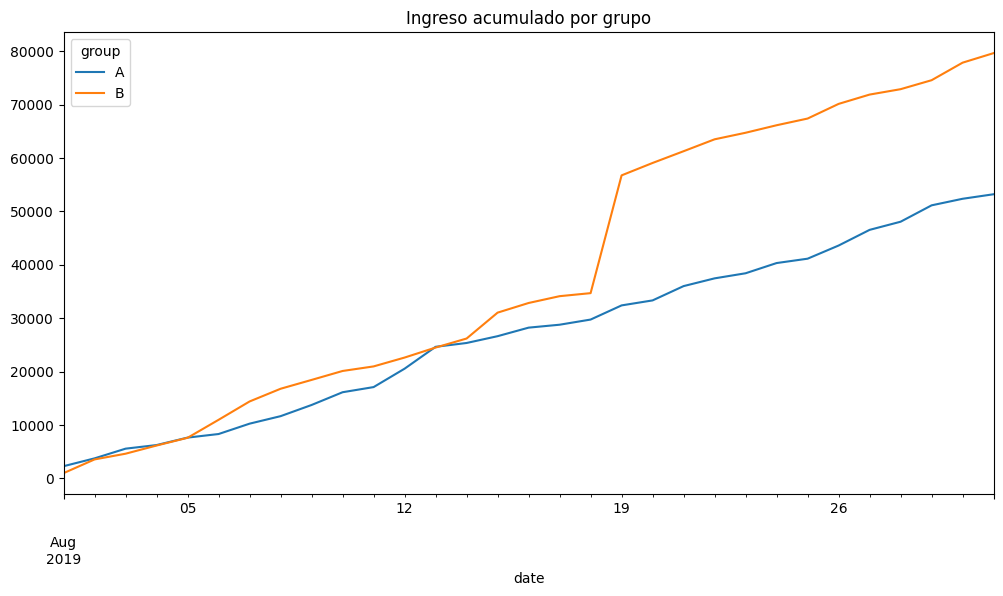

In [ ]:
revenue_sum = orders_pd.groupby(['date', 'group'])['revenue'].sum().reset_index()
revenue_pivot = revenue_sum.pivot(index='date', columns='group', values='revenue').fillna(0)
revenue_ac = revenue_pivot.cumsum()
print(revenue_ac)
# Graficar
revenue_ac.plot(figsize=(12,6), title="Ingreso acumulado por grupo")

Inicialmente (hasta el 05 de Ago del 2019), ambos grupos iban muy a la par, para el 19, el grupo B marco diferencia con un pico de casi ~25k USD más, continuando con esa brecha hasta fin de mes. Se puede decir, hasta aquí, que hay mayores ingresos del grupo B que del grupo A.
Ahora es necesario verificar:
* Es una diferencia significativa o al azar 
* ¿El grupo B tiene más usuarios?

### Tamaño de pedido promedio acumulado por grupo

group                A           B
date                              
2019-08-01   98.547826   56.894118
2019-08-02   87.913387   84.275320
2019-08-03   83.820036   81.697832
2019-08-04   78.217299   88.623374
2019-08-05   75.282930   84.701556
2019-08-06   70.162442   94.999848
2019-08-07   77.478522  102.767571
2019-08-08   80.336564  103.443784
2019-08-09   92.573915  101.635410
2019-08-10   99.233190   99.084597
2019-08-11   98.173975   96.557209
2019-08-12  105.119126   95.781828
2019-08-13  119.543479   95.623610
2019-08-14  114.015583   97.428046
2019-08-15  114.916544  103.367458
2019-08-16  113.286691  103.181298
2019-08-17  112.000219  102.885565
2019-08-18  109.904480  101.681605
2019-08-19  110.770661  151.630443
2019-08-20  109.912127  149.860421
2019-08-21  111.056550  151.455163
2019-08-22  112.603525  149.396595
2019-08-23  109.781850  147.011124
2019-08-24  111.336132  145.069292
2019-08-25  110.973687  143.450853
2019-08-26  112.630468  142.731240
2019-08-27  113.1847

<AxesSubplot:title={'center':'Tamaño de pedido promedio acumulado por grupo'}, xlabel='date'>

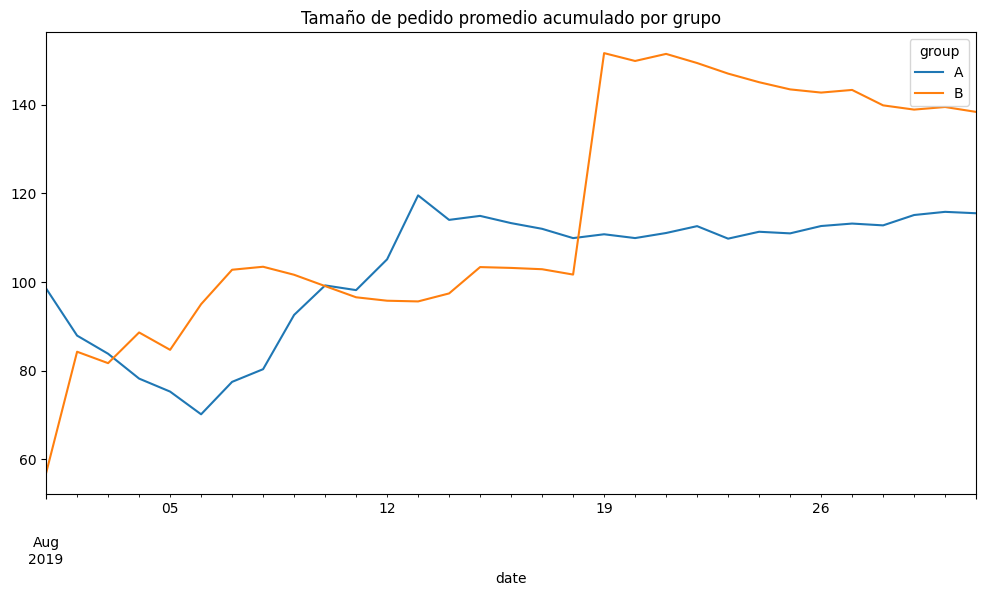

In [ ]:
avg_order= orders_pd.groupby(['date', 'group'])['revenue'].mean().reset_index()
avg_order_pivot = avg_order.pivot(index='date', columns='group', values='revenue').fillna(0)
avg_order_ac = avg_order_pivot.expanding().mean()
print(avg_order_ac)
# Graficar
avg_order_ac.plot(figsize=(12,6), title="Tamaño de pedido promedio acumulado por grupo")

El grupo A inicia con casi el doble de ingresos promedio, para el 4 de agosto se observa que el grupo B está por arriba,  se vuelven a igualar para el 10 de agosto y el grupo A empieza a marcar una pequeña diferencia. Para el 19 de agosto el grupo B vuelve a aumentar y empieza a marcar una diferencia de ~41 USD, cerrando el mes con una diferencia de 23 USD.
El Grupo B está realizando compras de mayor valor en promedio.
Las preguntas que surgen ahora son:
* ¿Qué pasó el 19 de agosto  que impacto las compras del grupo B?
*¿Están comprando más artículos o artículos más caros?

### Representción gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

date
2019-08-01   -0.422675
2019-08-02   -0.041382
2019-08-03   -0.025319
2019-08-04    0.133041
2019-08-05    0.125110
2019-08-06    0.353999
2019-08-07    0.326401
2019-08-08    0.287630
2019-08-09    0.097884
2019-08-10   -0.001497
2019-08-11   -0.016468
2019-08-12   -0.088826
2019-08-13   -0.200093
2019-08-14   -0.145485
2019-08-15   -0.100500
2019-08-16   -0.089202
2019-08-17   -0.081381
2019-08-18   -0.074818
2019-08-19    0.368868
2019-08-20    0.363457
2019-08-21    0.363766
2019-08-22    0.326749
2019-08-23    0.339120
2019-08-24    0.302985
2019-08-25    0.292656
2019-08-26    0.267252
2019-08-27    0.266308
2019-08-28    0.240033
2019-08-29    0.206550
2019-08-30    0.204181
2019-08-31    0.197889
dtype: float64


<AxesSubplot:title={'center':'Diferencia relativa del tamaño de pedido promedio (B vs A)'}, xlabel='date'>

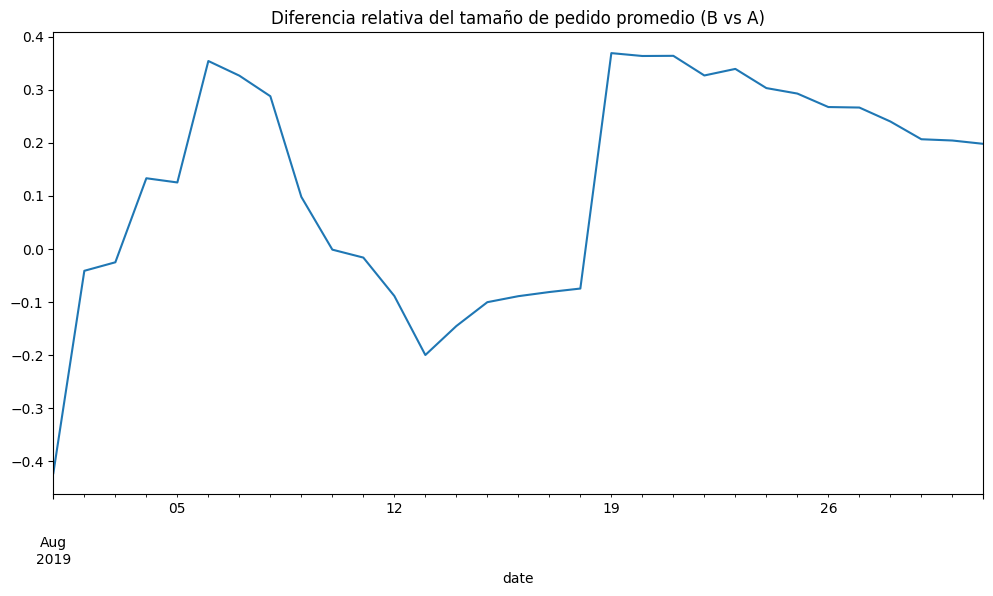

In [ ]:
relative_diff = (avg_order_ac['B'] - avg_order_ac['A']) / avg_order_ac['A']
print(relative_diff)
relative_diff.plot(figsize=(12,6), title="Diferencia relativa del tamaño de pedido promedio (B vs A)")

Los principales picos son el 6 de agosto y el 19 de agosoto siendo de 35% y 37%, donde el grupo B es mayor y como se explico anteriormente, termina el mes siendo mayor por una diferencia del ~20%.
Se observa que del 10-18 de agosto el grupo A tuvo una ventaja pero lo máximo que logro marcar está ventaja fue del 20% y se fue haciendo más pequeña.
Las preguntas planteadas son las mismas que se comentaron anteriormente:
* ¿Qué pasó el 19 de agosto  que impacto las compras del grupo B?
* ¿Están comprando más artículos o artículos más caros?

### Tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día

group              A         B
date                          
2019-08-01  0.031989  0.023843
2019-08-02  0.030695  0.039587
2019-08-03  0.047337  0.027505
2019-08-04  0.015342  0.018182
2019-08-05  0.029101  0.029703
2019-08-06  0.022489  0.035115
2019-08-07  0.024845  0.032440
2019-08-08  0.022951  0.033639
2019-08-09  0.017828  0.031148
2019-08-10  0.036946  0.059621
2019-08-11  0.015320  0.016644
2019-08-12  0.031933  0.034991
2019-08-13  0.018717  0.026008
2019-08-14  0.023129  0.018767
2019-08-15  0.015924  0.047794
2019-08-16  0.049861  0.043584
2019-08-17  0.014563  0.030879
2019-08-18  0.019461  0.009498
2019-08-19  0.041833  0.043121
2019-08-20  0.017391  0.035714
2019-08-21  0.030960  0.018293
2019-08-22  0.016420  0.032308
2019-08-23  0.042735  0.023810
2019-08-24  0.032911  0.037037
2019-08-25  0.012882  0.017673
2019-08-26  0.022161  0.032544
2019-08-27  0.032349  0.015278
2019-08-28  0.025253  0.033639
2019-08-29  0.029463  0.028249
2019-08-30  0.018367  0.042857
2019-08-

<AxesSubplot:title={'center':'Tasa de conversión diaria por grupo'}, xlabel='date'>

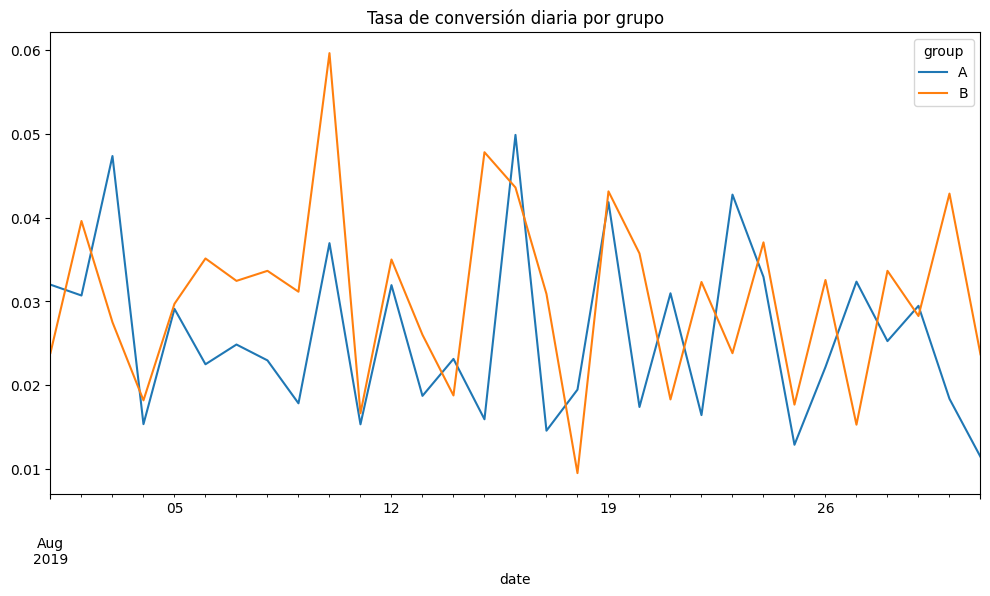

In [ ]:
orders_daily = orders_pd.groupby(['date', 'group'])['transactionId'].nunique().reset_index()

visits_daily = visits_pd.groupby(['date', 'group'])['visits'].sum().reset_index()

merge_df = pd.merge(orders_daily, visits_daily, on=['date', 'group'])
merge_df['conversion'] = merge_df['transactionId'] / merge_df['visits']

conversion_pivot = merge_df.pivot(index='date', columns='group', values='conversion')
print(conversion_pivot)

conversion_pivot.plot(figsize=(12,6), title="Tasa de conversión diaria por grupo")

No hay un patrón consistente donde un grupo supere claramente al otro.
Ambos grupos muestran fluctuaciones significativas día a día, lo que lo se puede describir como volátil.
Al inicio de agosto (hasta el 5 aproximadamente), el Grupo A parece tener algunos picos más altos.
Alrededor del 7-8 de agosto, el Grupo B tiene un pico notablemente alto.
El 12 de agosto, el Grupo A tiene un pico.
Alrededor del 19 de agosto, el Grupo B sí tiene un pico de conversión significativo, pero no es tan significativo pero el grupo A está muy cercano. 
Hacia finales de agosto, la tendencia sigue fluctuando.
* La principal razón de este mayor ingreso en el Grupo B es que los usuarios están realizando pedidos de un tamaño promedio mucho mayor, no necesariamente que estén convirtiendo más usuarios. Es decir, los usuarios del Grupo B, cuando deciden realizar una compra, tienden a gastar una cantidad considerablemente mayor por pedido.
* La tasa de conversión diaria por sí sola no explica la diferencia en ingresos.

### Gráfico de dispersión del número de pedidos por usuario

      visitorId  orders
0       5114589       1
1       6958315       1
2      11685486       1
3      39475350       1
4      47206413       1
..          ...     ...
968  4259830713       1
969  4278982564       1
970  4279090005       1
971  4281247801       1
972  4283872382       1

[973 rows x 2 columns]


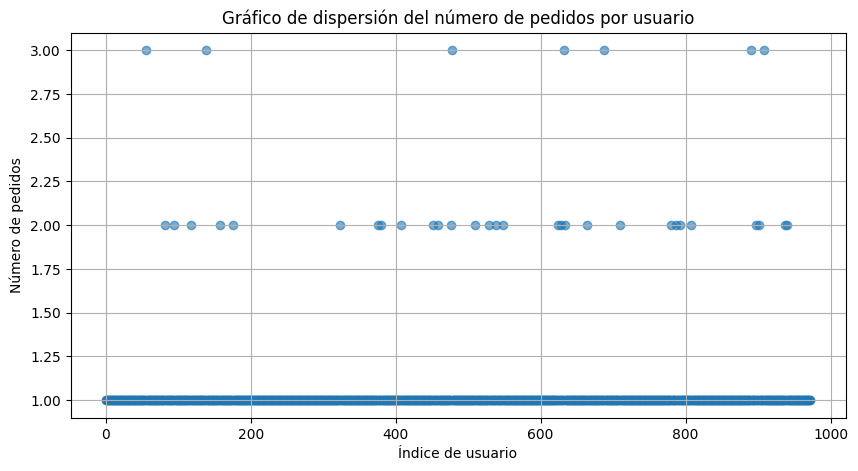

In [ ]:
import matplotlib.pyplot as plt

orders_per_user = orders_pd.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_per_user.columns = ['visitorId', 'orders']
print(orders_per_user)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(orders_per_user)), orders_per_user['orders'], alpha=0.6)
plt.title('Gráfico de dispersión del número de pedidos por usuario')
plt.xlabel('Índice de usuario')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()

La gran mayoría de los usuarios han realizado solo 1 pedido.
Existe un número mucho menor de usuarios que han realizado 2 pedidos y un número aún más pequeño que realizo 3.
No hay usuarios que hayan realizado más de 3 pedidos
Podemos decir:
* No hay outliers drásticos, es decir, usuarios con >10 pedidos, lo cual podría afectar las medidas.
* Dado que los outliers de 3 pedidos no son significativos no es necesario eliminarlos o cambiarlos a la moda.
* La mayoría de tus usuarios son de compra única durante el período del test.
*Hay que nalizar la distribución del revenue (ingreso) total por visitorId

### Percentiles 95 y 99 del número de pedidos por usuario.

In [ ]:
import numpy as np
print("P95:", np.percentile(orders_per_user['orders'], 95))
print("P99:", np.percentile(orders_per_user['orders'], 99))

P95: 1.0
P99: 2.0


* Esto significa que el 95% de los usuarios han realizado 1 pedido o menos.
* el 1% de los usuarios han realizado más de 2 pedidos
* La gran mayoría de los usuarios son compradores únicos.
* Hay muy pocos usuarios que repiten compras

### Gráfico de dispersión de los precios de los pedidos.

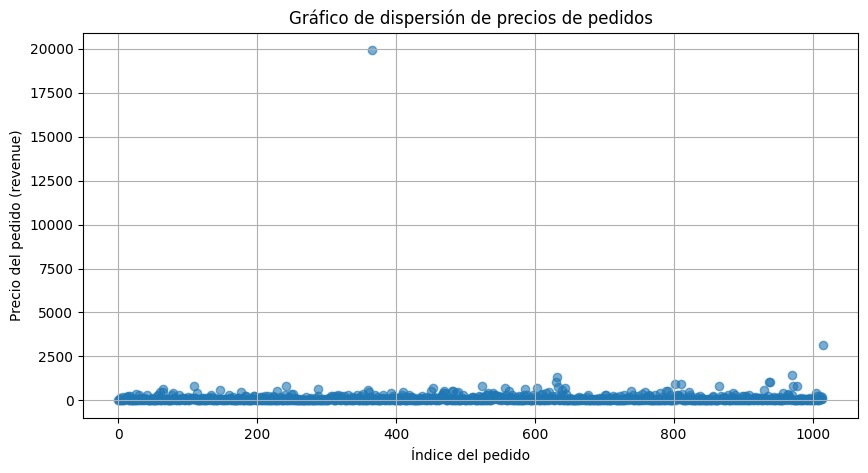

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(orders_pd)), orders_pd['revenue'], alpha=0.6)
plt.title('Gráfico de dispersión de precios de pedidos')
plt.xlabel('Índice del pedido')
plt.ylabel('Precio del pedido (revenue)')
plt.grid(True)
plt.show()

La mayoría de los puntos se agrupan en la parte inferior de la gráfica, por debajo de los 1000-2000 USD. 
Hay un número muy pequeño de pedidos con precios excepcionalmente altos.
Hay un número que parece estar cerca de 20,000 USD.
También hay otro punto que está por encima cerca de 3000.
Algunos otros puntos dispersos en el rango de 1000 a 2500
* Estos pedidos de alto valor son outliers y tienen el potencial de sesgar significativamente las métricas promedio y acumuladas, como el "Ingreso acumulado por grupo" y el "Tamaño de pedido promedio acumulado por grupo"
* Hay que calcular los percentiles 95 y 99 para determinar un umbral razonable para filtrar los outliers.
* Realizar el análisis del A/B test sin los outliers

### Percentiles 95 y 99 de los precios de los pedidos

In [ ]:
print("P95 del revenue:", np.percentile(orders_pd['revenue'], 95))
print("P99 del revenue:", np.percentile(orders_pd['revenue'], 99))

P95 del revenue: 414.275
P99 del revenue: 830.3


* P95 del revenue: 414.275. Esto significa que el 95% de los pedidos tienen un ingreso de $414.275 o menos.
  
* P99 del revenue: 830.3. Esto significa que el 99% de los pedidos tienen un ingreso de $830.3 o menos.

* Se podrían filtrar los pedidos con ingresos superiores al percentil 99 ($830.3). 

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

In [ ]:
from scipy import stats as st
import math as mth
alpha = 0.05
orders_by_group = orders_pd.groupby('group')['transactionId'].nunique()
visits_by_group = visits_pd.groupby('group')['visits'].sum()


purchases = np.array([orders_by_group['A'], orders_by_group['B']])
leads = np.array([visits_by_group['A'], visits_by_group['B']])


p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]

# Conversión combinada (hipótesis nula)
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])


difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

# p-valor (dos colas)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print(f"Conversion A: {p1:.4f}, Conversion B: {p2:.4f}")
print(f"Diferencia: {difference:.4f}")
print(f"Z-value: {z_value:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Rechazar H₀: hay diferencia significativa en la conversión.")
else:
    print(" No se puede rechazar H₀: no hay diferencia significativa en la conversión.")

Conversion A: 0.0250, Conversion B: 0.0290
Diferencia: -0.0040
Z-value: -2.3899
p-value: 0.0169
Rechazar H₀: hay diferencia significativa en la conversión.


* El grupo B tiene una tasa de conversión significativamente mayor que el grupo A (2.90% vs. 2.50%).

* El p-value es menor que 0.05, entonces el 95% de confianza que esta diferencia no se debe al azar.

* Hay diferencia significativa en la conversión.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

In [ ]:
from scipy.stats import mannwhitneyu
revenue_a = orders_pd[orders_pd['group'] == 'A']['revenue']
revenue_b = orders_pd[orders_pd['group'] == 'B']['revenue']

stat, p_value = mannwhitneyu(revenue_a, revenue_b, alternative='two-sided')

print(f"Tamaño promedio pedido A: {revenue_a.mean():.2f}")
print(f"Tamaño promedio pedido B: {revenue_b.mean():.2f}")
print(f"Mann–Whitney U p-value: {p_value:.4f}")

alpha = 0.05

if p_value < alpha:
    print("Rechazar H₀: hay diferencia significativa en el tamaño de los pedidos.")
else:
    print("No se puede rechazar H₀: no hay diferencia significativa en el tamaño de los pedidos.")


Tamaño promedio pedido A: 113.70
Tamaño promedio pedido B: 145.35
Mann–Whitney U p-value: 0.8622
No se puede rechazar H₀: no hay diferencia significativa en el tamaño de los pedidos.


* El grupo B parece tener pedidos más grandes en promedio, un ~21% más.
* El p-value = 0.8622 está muy por encima de 0.05, así que no se puede decir que el cambio afectó el tamaño del pedido.

Esto puede deberse a:

* Presencia de outliers (pedidos muy grandes).

* Tamaño de muestra insuficiente para detectar este efecto.

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [ ]:
many_orders_users = orders_per_user[orders_per_user['orders'] > 1].index
high_revenue_users = orders_pd[orders_pd['revenue'] > 414.28]['visitorId'].unique()
outliers = set(many_orders_users).union(set(high_revenue_users))
orders_filtered = orders_pd[~orders_pd['visitorId'].isin(outliers)]

orders_by_group = orders_filtered.groupby('group')['transactionId'].nunique()
visits_by_group = visits_pd.groupby('group')['visits'].sum()


purchases = np.array([orders_by_group['A'], orders_by_group['B']])
leads = np.array([visits_by_group['A'], visits_by_group['B']])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]


p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])

difference = p1 - p2

# Z-value
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print(f"Conversion A: {p1:.4f}, Conversion B: {p2:.4f}")
print(f"Diferencia: {difference:.4f}")
print(f"Z-value: {z_value:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rechazar H₀: hay diferencia significativa en la conversión.")
else:
    print("No se puede rechazar H₀: no hay diferencia significativa en la conversión.")

Conversion A: 0.0238, Conversion B: 0.0274
Diferencia: -0.0037
Z-value: -2.2641
p-value: 0.0236
Rechazar H₀: hay diferencia significativa en la conversión.


* El p-value (0.0236) es menor que 0.05, por lo que es estadísticamente significativo.

* Por lo tanto, la conversión del grupo B es significativamente mayor que la del grupo A, incluso después de eliminar los outliers.

*  Esto refuerza la confiabilidad del resultado: no es un efecto artificial causado por valores extremos.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [ ]:
from scipy import stats
revenue_A = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_B = orders_filtered[orders_filtered['group'] == 'B']['revenue']
mean_revenue_A = revenue_A.mean()
mean_revenue_B = revenue_B.mean()

print(f"Tamaño promedio pedido filtrado A: {mean_revenue_A:.2f}")
print(f"Tamaño promedio pedido filtrado B: {mean_revenue_B:.2f}")

stat, p_value = stats.mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')

print(f"Mann–Whitney U p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rechazar H₀: hay diferencia significativa en el tamaño promedio de los pedidos.")
else:
    print("No se puede rechazar H₀: no hay diferencia significativa en el tamaño promedio de los pedidos.")

Tamaño promedio pedido filtrado A: 82.60
Tamaño promedio pedido filtrado B: 78.33
Mann–Whitney U p-value: 0.7758
No se puede rechazar H₀: no hay diferencia significativa en el tamaño promedio de los pedidos.


* El p-value de Mann–Whitney es 0.7758, así que no hay evidencia estadística para decir que los tamaños promedios difieren.
* Aunque la conversión del grupo B es significativamente mayor, el tamaño promedio del pedido no muestra diferencias significativas.
* Esto podría indicar que el aumento de ingresos se debe a más compradores (mejor conversión) pero no a pedidos más grandes.

### Decisión basada en los resultados de la prueba

1. Parar la prueba y considerar líder al grupo B
Justificación:

* Hay evidencia estadística de que la conversión del grupo B es mejor.

* No se pierde rendimiento en el tamaño promedio del pedido.

* Mejorar conversión suele traducirse en mayor ingresos a largo plazo.

## Conclusión general

* RICE toma en cuenta el alcance a diferencia de ICE, por lo que el que está en primer lugar en ICE está en 5° en RICE, dado que su alcance debe ser más bajo, de igual manera se pueden observar que hay hipótesis con alcances mayores que hacen que en RICE tengan un mejor ranking pero más bajo en ICE.

* **La Conversión Impulsa el Rendimiento**
El resultado más significativo es la mejora estadísticamente significativa en la tasa de conversión del Grupo B. Con un 2.90% (y 2.74% tras el filtrado de outliers) frente al 2.50% (2.38% filtrado) del Grupo A, la variación logró que un mayor porcentaje de usuarios completaran una acción deseada (una compra, registro, etc.). La consistencia de este hallazgo, tanto en los datos brutos como en los filtrados (con p-values de 0.0169 y 0.0236 respectivamente, ambos por debajo de 0.05), da una confianza del 95% de que esta diferencia no se debe al azar, sino a la implementación del Grupo B.

* **El Tamaño del Pedido se Mantiene Estable**
Aunque inicialmente el Grupo B parecía tener un tamaño de pedido promedio mayor en los datos brutos ($145.35 vs $113.70), después de filtrar outliers, reveló que esta diferencia no es estadísticamente significativa. El p-value de Mann–Whitney U de 0.8622 (y 0.7758 en los datos filtrados) es muy superior a 0.05, lo que significa que no hay evidencia suficiente para afirmar que el Grupo B afecte el tamaño promedio de los pedidos. Esto es crucial, ya que asegura que la mejora en la conversión no viene a expensas de un menor valor por transacción.

* **Decisión Final: Implementar el Grupo B**
Basado en la evidencia estadística sólida que demuestra una mejora significativa en la tasa de conversión del Grupo B y la ausencia de un impacto negativo en el tamaño promedio del pedido, la recomendación clara es detener la prueba e implementar la variación del Grupo B.

Este aumento en la conversión se traducirá directamente en un mayor número de transacciones y, por ende, en un incremento en los ingresos generales a largo plazo. 